# 강의 정리 자료.. 
- Autogluon 으로 머신러닝을 그냥 돌리는 것은 사실상 의미가 적어서 확실한 eda 전처리가 필요한 증거 및 공부 자료입니다.

# 1. import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
#---#}
from autogluon.tabular import TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from autogluon.common import space
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data 

ref: <https://www.kaggle.com/competitions/bike-sharing-demand> 

`-` 자료 다운로드 

In [2]:
!kaggle competitions download -c bike-sharing-demand

Traceback (most recent call last):
  File "/root/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/root/anaconda3/lib/python3.11/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/root/anaconda3/lib/python3.11/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
!unzip bike-sharing-demand.zip -d data

unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [4]:
sampleSubmission = pd.read_csv('sampleSubmission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv') 

In [5]:
!rm -rf data
!rm bike-sharing-demand.zip

rm: cannot remove 'bike-sharing-demand.zip': No such file or directory


`-` 자료관찰

In [6]:
display("train",df_train,"test",df_test)

'train'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


'test'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


`-` train/test가 나누어진 시점 해석 

In [7]:
display("train",df_train[::24][:20], "test",df_test[::24][:10])

'train'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
24,2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17
48,2011-01-03 01:00:00,1,0,1,1,8.20,8.335,44,27.9993,0,2,2
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
120,2011-01-06 06:00:00,1,0,1,2,5.74,8.335,63,7.0015,0,36,36
144,2011-01-07 07:00:00,1,0,1,1,8.20,10.605,69,8.9981,8,76,84
168,2011-01-08 07:00:00,1,0,0,2,6.56,9.090,74,7.0015,1,8,9
192,2011-01-09 07:00:00,1,0,0,1,3.28,4.545,53,12.9980,1,5,6
216,2011-01-10 07:00:00,1,0,1,1,4.92,6.060,50,15.0013,2,75,77


'test'

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
24,2011-01-21 00:00:00,1,0,1,2,9.84,11.365,70,16.9979
48,2011-01-22 00:00:00,1,0,0,1,1.64,1.515,45,16.9979
72,2011-01-23 01:00:00,1,0,0,1,1.64,3.790,57,7.0015
96,2011-01-24 03:00:00,1,0,1,1,1.64,1.515,45,16.9979
120,2011-01-25 04:00:00,1,0,1,1,5.74,8.335,74,7.0015
144,2011-01-26 06:00:00,1,0,1,3,8.20,9.090,86,19.0012
168,2011-01-28 05:00:00,1,0,1,2,7.38,10.605,80,7.0015
192,2011-01-29 06:00:00,1,0,0,1,6.56,9.090,64,8.9981
216,2011-01-30 07:00:00,1,0,0,1,5.74,10.605,86,0.0000


`-` 시계열분석을 해야하나? 

코드들을 확인 (<https://www.kaggle.com/c/bike-sharing-demand/code?competitionId=3948&sortBy=voteCount>) -> 시계열분석은 아닌것 같지않어? 

`-` 데이터분석전략: 딱히 기세를 모델링할 필요를 못느끼겠음. 

- 오히려 시계열을 피처엔지어링하여 회귀문제로 바꾸는게 적절하다. 
- 시계열 -> 요일,시간의 피처추출 + 외부자료를 활용하여 휴일유무 체크 + 외부자료를 해당요일의 날씨체크 -> lm(y~X)의 회귀문제로 해석!

# 4. 적합1 -> 제출1

## A. 적합

In [8]:
set(df_train.columns) - set(df_test.columns)

{'casual', 'count', 'registered'}

`-` 데이터 전처리 

In [9]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#---# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)

In [10]:
df_test_featured

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


`-` step2~4

In [11]:
# step1 -- pass 
# step2
predictr = TabularPredictor(label='count')
# step3
predictr.fit(df_train_featured)
# step4 
yhat = predictr.predict(df_train_featured)
yyhat = predictr.predict(df_test_featured)

No path specified. Models will be saved in: "AutogluonModels/ag-20231211_135411"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231211_135411"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.11.5
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
CPU Count:

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	4.15s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	-134.0804	 = Validation score   (-root_mean_squared_error)
	3.0s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0128	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	6.7s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4294	 = Validation score   (-root_mean_squared_error)
	0.4s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-136.2374	 = Validation score   (-root_mean_squared_error)
	15.92s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-135.769	 = Validation score   (-root_mean_squared_error)
	0.61s	 = Training   runtime
	0.0s	 = Validation ru

`-` 적합한것을 관찰해보자. 

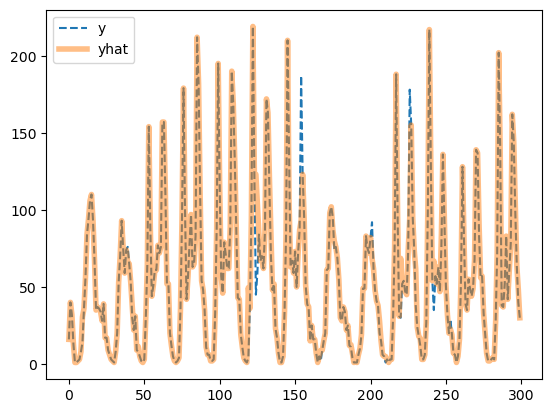

In [12]:
plt.plot(df_train['count'][:300],'--',label='y')
plt.plot(yhat[:300],alpha=0.5,lw=4,label='yhat')
plt.legend()

- 잘 맞추는데?.. (수상할 정도로)

## B. 제출

`-` 제출 

In [13]:
sampleSubmission['count'] = yyhat 
sampleSubmission.to_csv("submission.csv",index=False)
#!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Message"
#!rm submission.csv

`-` 순위확인 

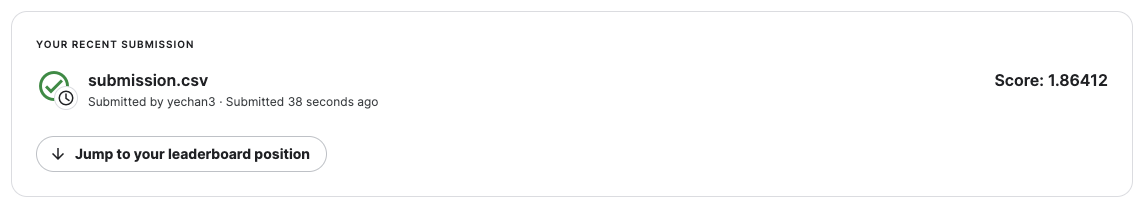

In [14]:
3171/3242 # 냈다면

0.9780999383096853

`-` yyhat을 살펴봄 

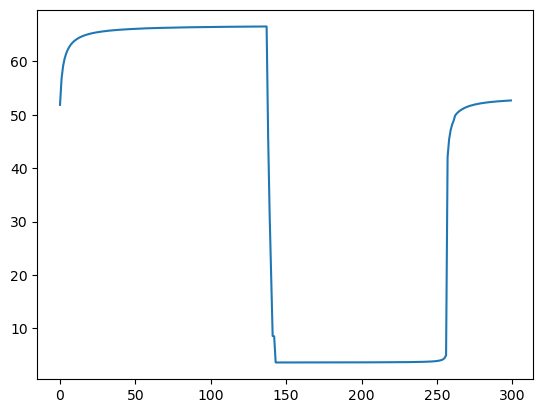

In [15]:
plt.plot(yyhat[:300])

- yhat이랑 모양자체가 너무 다름 

# 5. 적합2 -> 제출2

## A. 피처엔지니어링 

`-` 이미 시계열로 적합할 의지가 없으므로 `datetime`열은 삭제하는게 좋겠음. (인덱스의 역할만 하는 쓸모없는 변수) 

In [20]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)

## B. 적합

`-` 조용히 적합 (verbosity=False)

In [18]:
# step1 -- pass 
# step2
predictr = TabularPredictor(label='count',verbosity=False)
# step3
predictr.fit(df_train_featured)
# step4 
yhat = predictr.predict(df_train_featured)
yyhat = predictr.predict(df_test_featured)

`-` 적합결과 시각화 

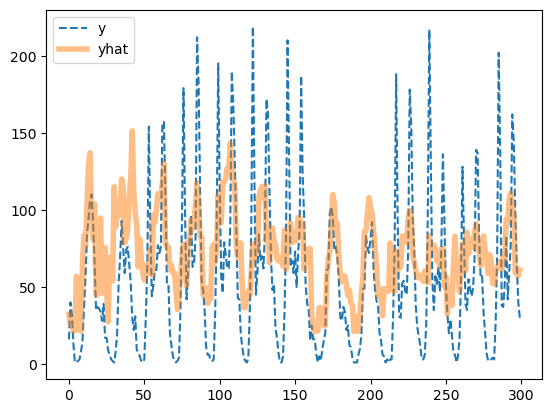

In [19]:
plt.plot(df_train['count'][:300],'--',label='y')
plt.plot(yhat[:300],alpha=0.5,lw=4,label='yhat')
plt.legend()

- 오히려 좋아

In [ ]:
plt.plot(yyhat[:300],alpha=0.5,lw=4,color='C1')

`-` 더 예쁜 시각화 

In [ ]:
df = pd.concat([
    df_train.assign(count_hat = yhat, dataset_type = 'train'),
    df_test.assign(count_hat = yyhat, dataset_type = 'test')
])
df['datetime'] = pd.to_datetime(df['datetime'])
sns.lineplot(
    df.sort_values('datetime')[:(24*28)],
    x='datetime',y='count',
    hue='dataset_type',
    linestyle='--',
    lw=0.8
)
sns.lineplot(
    df.sort_values('datetime')[:(24*28)],
    x='datetime',y='count_hat',
    hue='dataset_type',
    alpha=0.5,
    lw=3
)
fig = plt.gcf()
fig.set_size_inches(8,2)
plt.xticks(rotation=15);

시각화코드를 함수로 구현

In [ ]:
def plot(yhat,yyhat):
    df = pd.concat([
        df_train.assign(count_hat = yhat, dataset_type = 'train'),
        df_test.assign(count_hat = yyhat, dataset_type = 'test')
    ])
    df['datetime'] = pd.to_datetime(df['datetime'])
    sns.lineplot(
        df.sort_values('datetime')[:(24*28)],
        x='datetime',y='count',
        hue='dataset_type',
        linestyle='--',
        lw=0.8
    )
    sns.lineplot(
        df.sort_values('datetime')[:(24*28)],
        x='datetime',y='count_hat',
        hue='dataset_type',
        alpha=0.5,
        lw=3
    )
    fig = plt.gcf()
    fig.set_size_inches(8,2)
    plt.xticks(rotation=15); 
    fig.show()

In [ ]:
plot(yhat,yyhat)

## C. 제출

`-` 제출 

In [ ]:
sampleSubmission['count'] = yyhat 
sampleSubmission.to_csv("submission1.csv",index=False)
#!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Message"
#!rm submission.csv

`-` 순위확인 

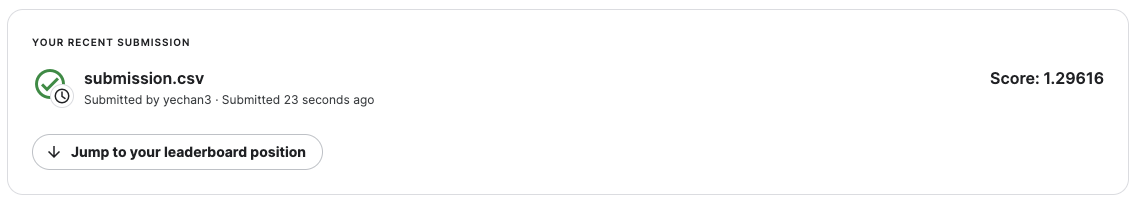

In [ ]:
2951/3242 # 냈다면

## D. Pipeline Automation -- 싹다 함수로 구현 

In [ ]:
def fit_predict(df_train_featured, df_test_featured):
    # step1 -- pass 
    # step2
    predictr = TabularPredictor(label='count',verbosity=False)
    # step3
    predictr.fit(df_train_featured)
    # step4 
    yhat = predictr.predict(df_train_featured)
    yyhat = predictr.predict(df_test_featured)
    # display
    display(predictr.leaderboard())
    return yhat, yyhat 

In [ ]:
def submit(yyhat):
    sampleSubmission['count'] = yyhat 
    sampleSubmission['count'] = sampleSubmission['count'].apply(lambda x: x if x>0 else 0)
    sampleSubmission.to_csv("submission.csv",index=False)
    !kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "Message"
    !rm submission.csv

In [ ]:
def auto(df_train_featured, df_test_featured):
    yhat,yyhat = fit_predict(df_train_featured, df_test_featured)
    plot(yhat,yyhat)
    submit(yyhat)

In [ ]:
auto(df_train_featured,df_test_featured)

# 6. 적합3 -> 제출3

## A. 시간정보 피처엔지니어링 

In [ ]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured['hour'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.hour
df_test_featured['hour'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.hour
df_train_featured['weekday'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.weekday
df_test_featured['weekday'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.weekday
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)

## B. 적합 -> 시각화 -> 제출 

In [ ]:
auto(df_train_featured,df_test_featured)

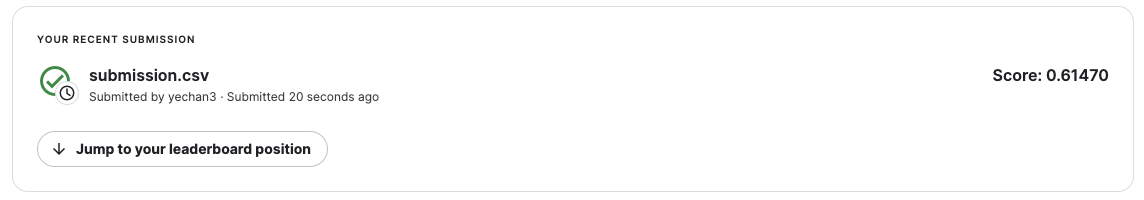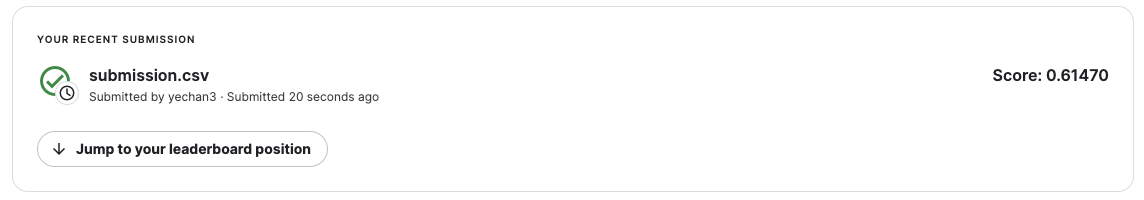

# 7. 추가적인 피처엔지니어링

## A. Step1 -- 관련없는 변수 삭제

`-` 지금까지 수행한 피처엔지니어링 

In [ ]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured['hour'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.hour
df_test_featured['hour'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.hour
df_train_featured['weekday'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.weekday
df_test_featured['weekday'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.weekday
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)

In [ ]:
sns.heatmap(df_train_featured.set_index('count').reset_index().corr(),vmin=-1,cmap='bwr')

- `holiday`, `workingday`, `weekday`는 `count`와 관련이 없어보인다. --> 제외하고 분석 

In [ ]:
auto(
    df_train_featured.drop(['holiday', 'workingday', 'weekday'],axis=1),
    df_test_featured.drop(['holiday', 'workingday', 'weekday'],axis=1)
)

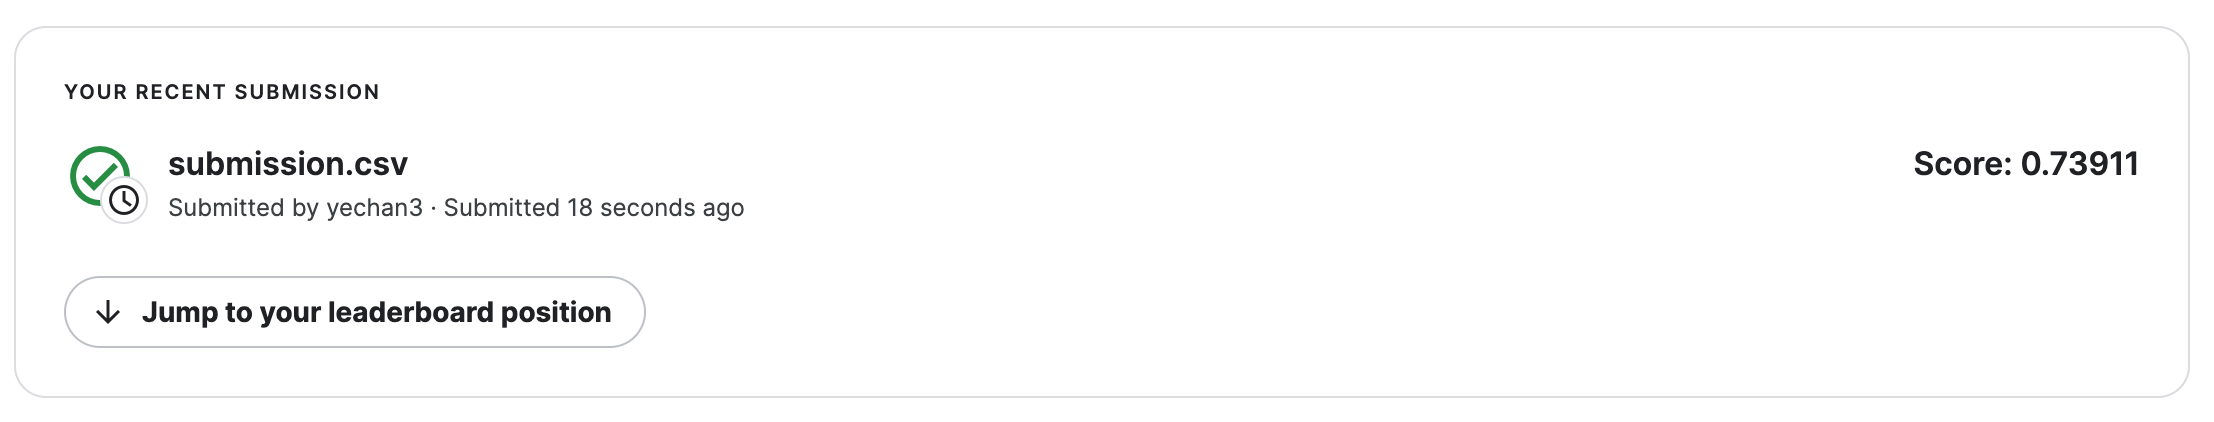

- 안좋아졌음.. 

`-` 왜 이런 결과가 나오는가? 

In [ ]:
sex =  np.array([0,0,0,0]*100+[0] + [1]+[1,1,1,1]*100 + [2]*401)
surv = np.array([0,0,0,0]*100+[1] + [0]+[1,1,1,1]*100 + [0]*401) 
surv_conti = surv + np.random.randn(len(surv))*0.1
_df = pd.DataFrame({'sex':sex, 'surv':surv, 'surv_conti':surv_conti})
_df.corr()

In [ ]:
sns.scatterplot(_df, x='sex',y='surv_conti',alpha=0.5)

In [ ]:
surv_conti.mean()

In [ ]:
sns.heatmap(_df.corr(),cmap='bwr',vmin=-1)

`-` 우리의 예제 

In [ ]:
sns.scatterplot(
    df_train_featured,
    x='holiday',
    y='count',
    alpha=0.1
)

In [ ]:
sns.scatterplot(
    df_train_featured,
    x='weekday',
    y='count',
    alpha=0.1
)

In [ ]:
sns.scatterplot(
    df_train_featured,
    x='workingday',
    y='count',
    alpha=0.1
)

## B. Step2 -- atemp 혹은 temp 삭제

`-` 지금까지 한 피처엔지니어링 

In [ ]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured['hour'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.hour
df_test_featured['hour'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.hour
df_train_featured['weekday'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.weekday
df_test_featured['weekday'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.weekday
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)

In [ ]:
sns.heatmap(df_train_featured.set_index('count').reset_index().corr(),vmin=-1,cmap='bwr')

- temp와 atemp가 동시에 있어서 공선성 문제를 만들 수 있어보임. 
- 둘중 하나를 제거하는게 좋을것 같음. 

In [ ]:
auto(
    df_train_featured.drop(['temp'],axis=1),
    df_test_featured.drop(['temp'],axis=1)
)

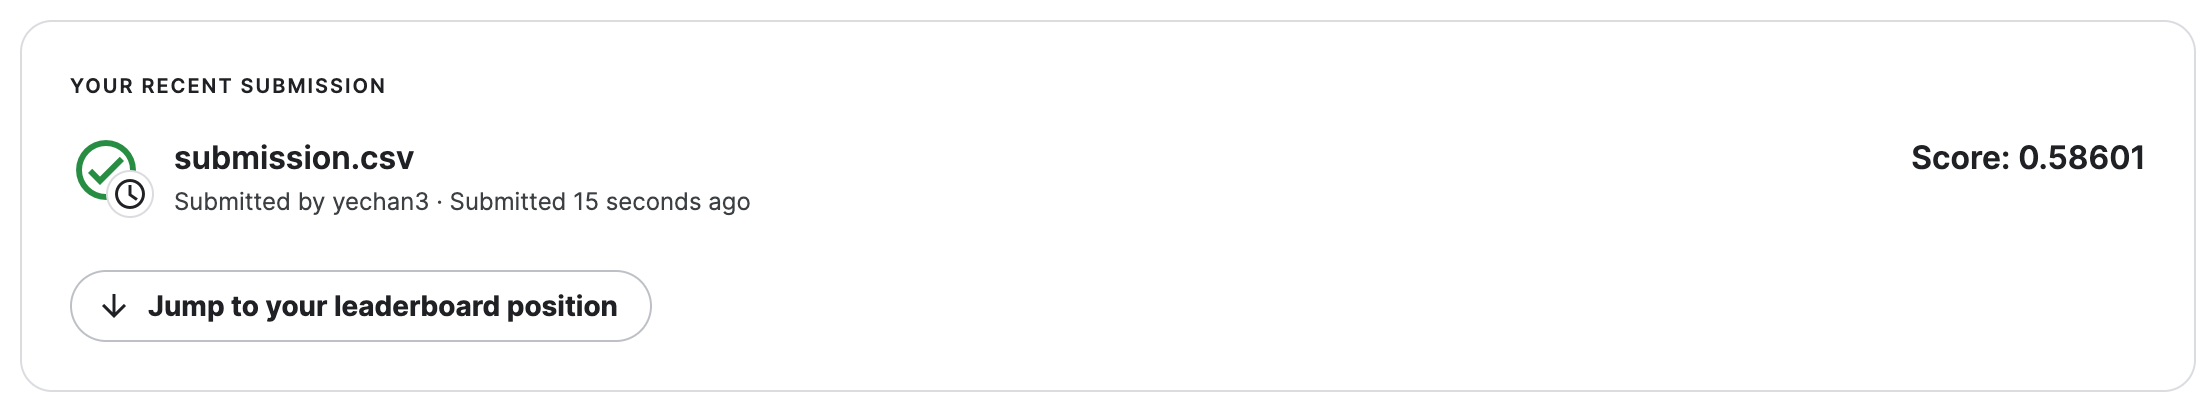


In [ ]:
auto(
    df_train_featured.drop(['atemp'],axis=1),
    df_test_featured.drop(['atemp'],axis=1)
)

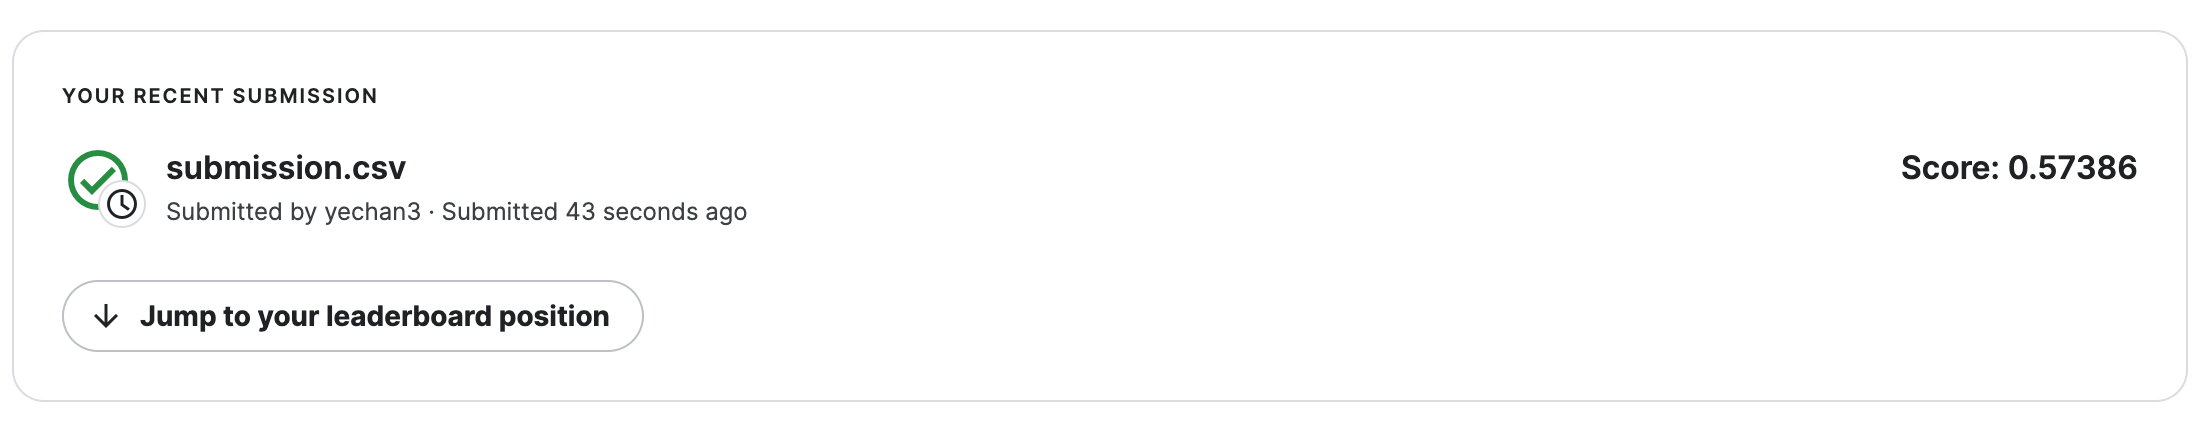

## C. Step3 -- season을 범주로?

`-` 지금까지한 피처엔지니어링 

In [ ]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured['hour'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.hour
df_test_featured['hour'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.hour
df_train_featured['weekday'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.weekday
df_test_featured['weekday'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.weekday
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)
#--#
df_train_featured = df_train_featured.drop(['atemp'],axis=1)
df_test_featured = df_test_featured.drop(['atemp'],axis=1)

`-` 사실 season의 의미는 `season -  1 = spring, 2 = summer, 3 = fall, 4 = winter` 임 

- 지금은 season이 1,2,3,4로 코딩되어 있는데, 이것을 문자열로 바꾸면 더 좋지 않을까? 

In [ ]:
auto(
    df_train_featured.assign(season = df_train_featured.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})),
    df_test_featured.assign(season = df_train_featured.season.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
)

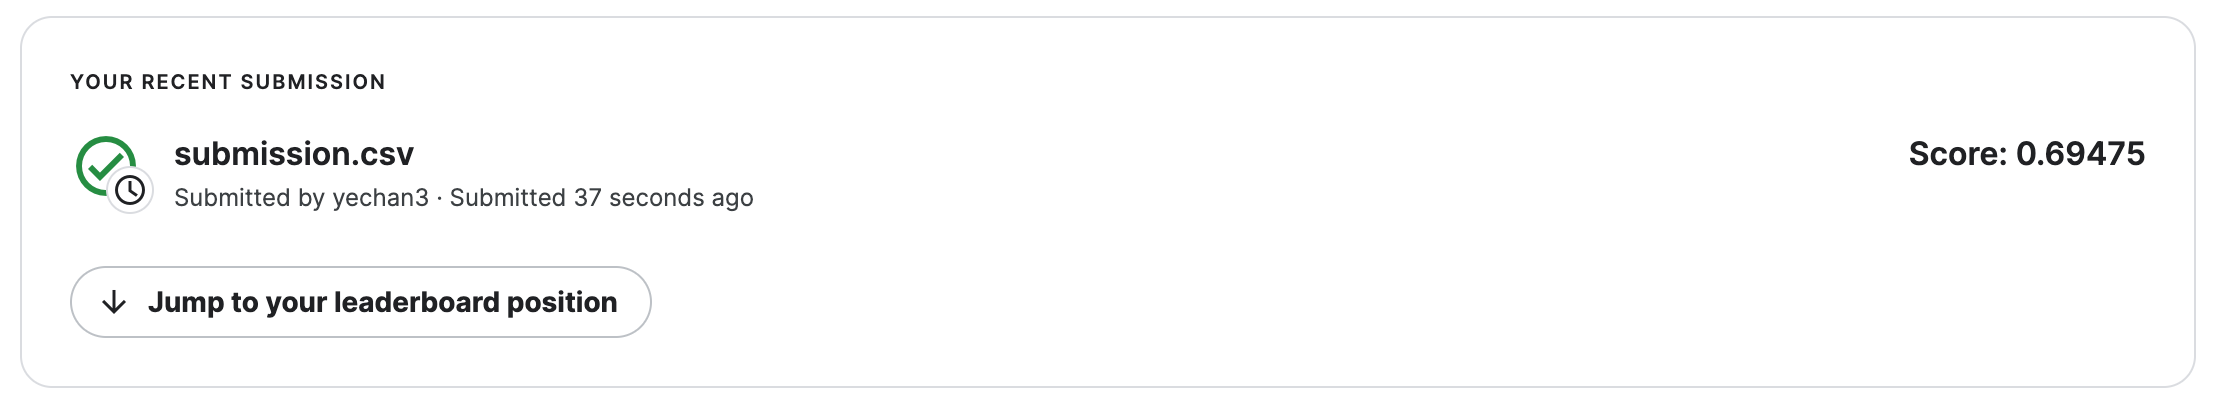

- 이건 적용하지 말자.
- 어차피 트리계열은 명목형변수를 순서형변수로 잘못 적용해도 크게 상관없음. 

## D. Step4 -- $y$의 분포

`-` 지금까지한 피처엔지니어링 

In [ ]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()
#----# 
df_train_featured = df_train_featured.drop(['casual','registered'],axis=1)
#--#
df_train_featured['hour'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.hour
df_test_featured['hour'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.hour
df_train_featured['weekday'] = df_train_featured['datetime'].apply(pd.to_datetime).dt.weekday
df_test_featured['weekday'] = df_test_featured['datetime'].apply(pd.to_datetime).dt.weekday
#--#
df_train_featured = df_train_featured.drop(['datetime'],axis=1)
df_test_featured = df_test_featured.drop(['datetime'],axis=1)
#--#
df_train_featured = df_train_featured.drop(['atemp'],axis=1)
df_test_featured = df_test_featured.drop(['atemp'],axis=1)

In [ ]:
df_train_featured['count'].hist() # 정규분포가 아니네

In [ ]:
transfomr = sklearn.preprocessing.PowerTransformer(method='box-cox')

In [ ]:
count2 = transfomr.fit_transform(df_train_featured[['count']]).reshape(-1)
plt.hist(count2);

In [ ]:
df_train_featured.assign(count = count2)

`-` 적합 

In [ ]:
# step1 -- pass 
# step2 
predictr = TabularPredictor(label='count',verbosity=False)
# step3
predictr.fit(df_train_featured.assign(count = count2))
# step4
yhat = predictr.predict(df_train_featured) 
yyhat = predictr.predict(df_test_featured)

In [ ]:
yhat = transfomr.inverse_transform(yhat.to_frame()).reshape(-1)
yyhat = transfomr.inverse_transform(yyhat.to_frame()).reshape(-1)

In [ ]:
plot(yhat,yyhat)

In [ ]:
submit(yyhat)

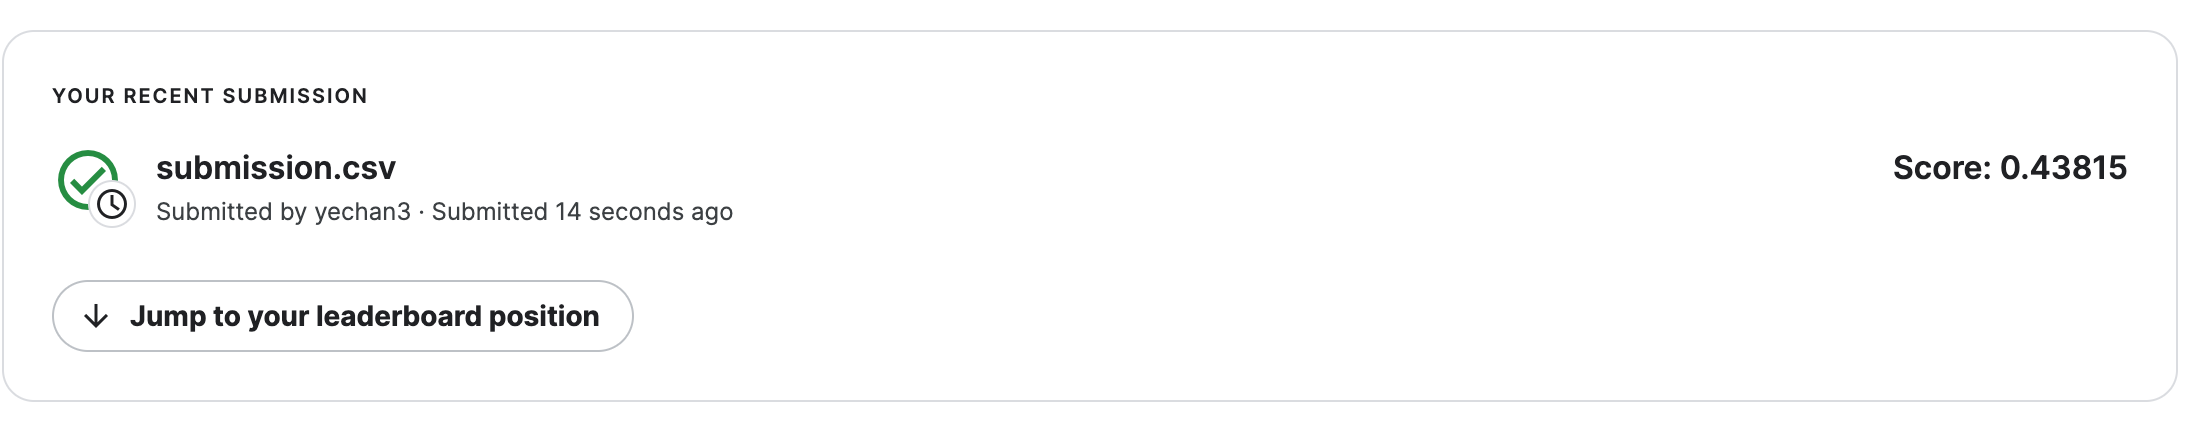

# 8. HW

box-cox transform이 아닌 `log1p`변환을 취해서 결과를 구해볼 것 

In [ ]:
np.log1p(0.1234), np.log(0.1234+1)

In [ ]:
np.expm1(0.11635980111619529)

결과는 아래와 같음 

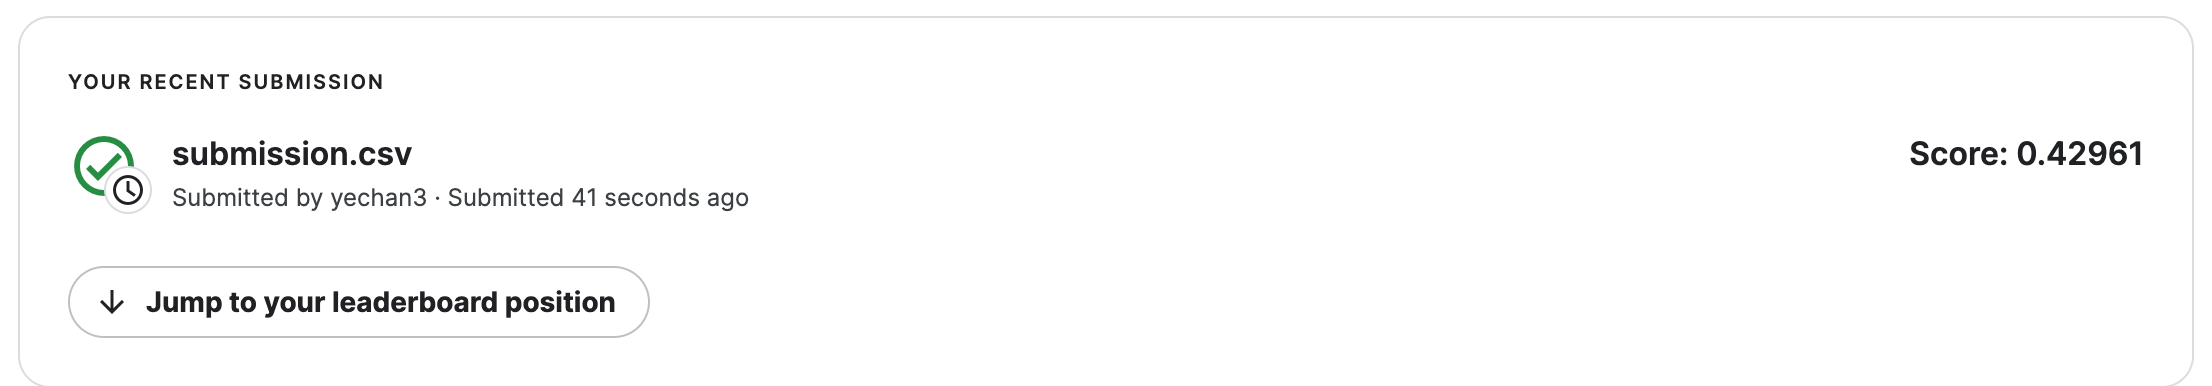